<a href="https://colab.research.google.com/github/roldanpau/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensor flow development

In [743]:
# mlp for binary classification
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from tensorflow.keras import regularizers

pd.set_option('display.max_columns', None) # Display all columns of dataframes

In [744]:
# PARAMETERS
val_size = 100    # size of validation set

In [745]:
# Download dataset
TITANIC_TRAIN = "https://raw.githubusercontent.com/borjagomez/TF-Titanic/master/data/train.csv"
TITANIC_TEST = "https://raw.githubusercontent.com/borjagomez/TF-Titanic/master/data/test.csv"

train_data = pd.read_csv(TITANIC_TRAIN)
test_data = pd.read_csv(TITANIC_TEST)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [746]:
y = train_data["Survived"]

# Use only these features, converting categorical variables (such as "Sex" and 
# "Embarked") into indicator (or "dummy") variables
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# To scale X and X_test homogeneously, we concat them in a single dataframe, X2.
X2 = pd.concat([X, X_test])

# Show which columns have unknown values
#print(X2.isna().sum())

# We have NaN values in Age and Fare. 
# Substitute missing "Fare" values by the average.
X2["Fare"] = X2.Fare.fillna(X2.Fare.mean())

print("Mean age:", X2.Age.mean())

# Predict missing "Age" values
cols = ["Pclass", "SibSp", "Parch", "Age"]
df = X2[cols]

age_test_data = df[df["Age"].isnull()]
age_data = df.dropna(inplace=False)

age_y_train = age_data["Age"]
age_X_train = age_data.drop("Age", axis=1)
age_y_test = age_test_data["Age"]
age_X_test = age_test_data.drop("Age", axis=1)

age_model = LinearRegression()
age_model.fit(age_X_train, age_y_train)

age_y_pred = age_model.predict(age_X_test)

#replace the missing values with predicted values
X2.loc[X2.Age.isnull(), 'Age'] = age_y_pred

#print(X2.isna().sum())

# (PRG: Debug...)
X_test = X2.iloc[X.shape[0]:, :]
print(X_test["Age"].to_frame().T)

Mean age: 29.881137667304014
      0     1     2     3     4     5     6     7     8     9          10   \
Age  34.5  47.0  62.0  27.0  22.0  14.0  30.0  26.0  18.0  21.0  26.567571   

      11    12    13    14    15    16    17    18    19    20   21   \
Age  46.0  23.0  63.0  47.0  24.0  35.0  21.0  27.0  45.0  55.0  9.0   

           22    23    24    25    26    27    28         29    30    31   \
Age  40.185224  21.0  48.0  50.0  22.0  22.5  41.0  20.282929  50.0  24.0   

      32         33    34    35         36    37    38         39    40   \
Age  33.0  21.035862  30.0  18.5  26.567571  21.0  25.0  26.567571  39.0   

           41    42    43    44    45    46         47    48    49    50   \
Age  40.185224  41.0  30.0  45.0  25.0  45.0  26.567571  60.0  36.0  24.0   

      51    52    53         54    55    56    57        58    59    60   \
Age  27.0  20.0  28.0  33.376397  10.0  35.0  25.0  23.42525  36.0  17.0   

      61    62    63    64         65    66    67    

In [747]:
scaler = MinMaxScaler()
X2 = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns)
#print(X2.head())

print(X.shape[0])

X = X2.iloc[:X.shape[0], :]
X_test = X2.iloc[X.shape[0]:, :]
#print(X.head())
#print(X.tail())
#print(X_test.head())
#print(X_test.tail())

print(X_test.head)


891
<bound method NDFrame.head of       Pclass       Age  SibSp     Parch      Fare  Sex_female  Sex_male  \
891      1.0  0.437997  0.000  0.000000  0.015282         0.0       1.0   
892      1.0  0.592393  0.125  0.000000  0.013663         1.0       0.0   
893      0.5  0.777669  0.000  0.000000  0.018909         0.0       1.0   
894      1.0  0.345359  0.000  0.000000  0.016908         0.0       1.0   
895      1.0  0.283600  0.125  0.111111  0.023984         1.0       0.0   
...      ...       ...    ...       ...       ...         ...       ...   
1304     1.0  0.340018  0.000  0.000000  0.015713         0.0       1.0   
1305     0.0  0.493579  0.000  0.000000  0.212559         1.0       0.0   
1306     1.0  0.487404  0.000  0.000000  0.014151         0.0       1.0   
1307     1.0  0.340018  0.000  0.000000  0.015713         0.0       1.0   
1308     1.0  0.286448  0.125  0.111111  0.043640         0.0       1.0   

      Embarked_C  Embarked_Q  Embarked_S  
891          0.0      

In [748]:
print(X)
print(X_test)
print(y)

     Pclass       Age  SibSp     Parch      Fare  Sex_female  Sex_male  \
0       1.0  0.283600  0.125  0.000000  0.014151         0.0       1.0   
1       0.0  0.481228  0.125  0.000000  0.139136         1.0       0.0   
2       1.0  0.333007  0.000  0.000000  0.015469         1.0       0.0   
3       0.0  0.444173  0.125  0.000000  0.103644         1.0       0.0   
4       1.0  0.444173  0.000  0.000000  0.015713         0.0       1.0   
..      ...       ...    ...       ...       ...         ...       ...   
886     0.5  0.345359  0.000  0.000000  0.025374         0.0       1.0   
887     0.0  0.246545  0.000  0.000000  0.058556         1.0       0.0   
888     1.0  0.271691  0.125  0.222222  0.045771         1.0       0.0   
889     0.0  0.333007  0.000  0.000000  0.058556         0.0       1.0   
890     1.0  0.407117  0.000  0.000000  0.015127         0.0       1.0   

     Embarked_C  Embarked_Q  Embarked_S  
0           0.0         0.0         1.0  
1           1.0         0.0

To evaluate how well the trained model performs on unseen data, we further split the dataset into separate training and test datasets.

In [749]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.125, 
                                                  random_state=1, 
                                                  stratify=y)

# Reserve 100 samples for validation
# X_val = X[-val_size:]
# y_val = y[-val_size:]
# X_train = X[:-val_size]
# y_train = y[:-val_size]

print(X_train)
print(y_train)

     Pclass       Age  SibSp     Parch      Fare  Sex_female  Sex_male  \
35      0.0  0.530635  0.125  0.000000  0.101497         0.0       1.0   
787     1.0  0.110676  0.500  0.111111  0.056848         0.0       1.0   
164     1.0  0.024214  0.500  0.111111  0.077465         0.0       1.0   
780     1.0  0.172435  0.000  0.000000  0.014110         1.0       0.0   
239     0.5  0.419469  0.000  0.000000  0.023959         0.0       1.0   
..      ...       ...    ...       ...       ...         ...       ...   
338     1.0  0.567690  0.000  0.000000  0.015713         0.0       1.0   
265     0.5  0.456524  0.000  0.000000  0.020495         0.0       1.0   
546     0.5  0.246545  0.125  0.000000  0.050749         1.0       0.0   
413     0.5  0.424118  0.000  0.000000  0.000000         0.0       1.0   
464     1.0  0.340018  0.000  0.000000  0.015713         0.0       1.0   

     Embarked_C  Embarked_Q  Embarked_S  
35          0.0         0.0         1.0  
787         0.0         1.0

Number of features:  10


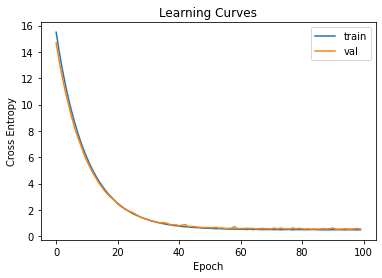

Accuracy on validation data:
0.7907573580741882


In [750]:
num_epochs = 100

# determine the number of input features
n_features = X_train.shape[1]
print("Number of features: ", n_features)

# define model
model = Sequential()
model.add(Dense(512, activation='relu', 
                #kernel_initializer='he_normal', 
                kernel_regularizer=regularizers.l2(0.01),
                input_shape=(n_features,)))
model.add(Dense(512, activation='relu', 
                #kernel_initializer='he_normal', 
                kernel_regularizer=regularizers.l2(0.01),
                ))
model.add(Dense(512, activation='relu', 
                #kernel_initializer='he_normal', 
                kernel_regularizer=regularizers.l2(0.01),
                ))
model.add(Dense(512, activation='relu', 
                #kernel_initializer='he_normal', 
                kernel_regularizer=regularizers.l2(0.01),
                ))
model.add(Dense(1, activation='sigmoid'))

# Configure the Adam optimization
# Adam = tf.keras.optimizers.Adam(
#     learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
#     name='Adam'
# )

# Configure the SGD optimization
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

# compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=num_epochs, 
                    batch_size=32, 
                    verbose=0, 
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(X_val, y_val))

# We defenitely have a problem of variance or overfitting. We should regularize.
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# PRG: This seems to refer to accuracy ON THE LAST BATCH of validation data 
# (i.e. only on one batch of examples of size batch_size=32).
# (See https://stackoverflow.com/questions/56447493/keras-model-fit-with-validation-data-which-batch-size-is-used-to-evaluate-the)
print("Accuracy on validation data:")
print(history.history['accuracy'][num_epochs-1])

# Next steps
# 1. Regularization
# 2. Add Cabin, Ticket or even Name attributes to the dataset


Evaluate the model on the ENTIRE validation set

In [751]:
results = model.evaluate(X_val, y_val, batch_size=val_size)
#print("test loss, test acc:", results)

2/2 [==============================] - 0s 9ms/step - loss: 0.5439 - accuracy: 0.7946


# Evaluate the model on the test data

In [752]:
# Generate predictions for the passengers in test.csv
predictions = np.rint(model.predict(X_test).flatten()).astype(int)

#print(predictions)
#print(test_data.PassengerId)

# Save these new predictions in a CSV file my_submission.csv.
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_TF.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
